In [2]:
%pip install statsmodels


  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 35.8 MB/s  0:00:00eta 0:00:01
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
TRAIN_PATH = "../../data/training_data.csv"
TEST_PATH = "../../data/test_data.csv"

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [3]:
TARGET = "salary_usd_normalized"

DROP_COLS = [
    "job_id",
    "job_title",
    "skills_required",
    "posting_date",
    "salary_usd"
]

X_train = train_df.drop(columns=DROP_COLS + [TARGET])
y_train = train_df[TARGET]

X_test = test_df.drop(columns=DROP_COLS + [TARGET])
y_test = test_df[TARGET]

In [4]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [5]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [7]:
# Ensure all features are numeric
X_train_ols = X_train_ols.astype(float)
X_test_ols = X_test_ols.astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [8]:
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     salary_usd_normalized   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.127
Date:                   Mon, 05 Jan 2026   Prob (F-statistic):              0.337
Time:                           16:25:47   Log-Likelihood:                -1382.0
No. Observations:                   8000   AIC:                             2786.
Df Residuals:                       7989   BIC:                             2863.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [9]:
ols_model.save("currentOlsSolution.pkl")


In [10]:
y_pred_ols = ols_model.predict(X_test_ols)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2 = r2_score(y_test, y_pred_ols)

print("OLS RMSE:", rmse)
print("OLS R²:", r2)

OLS RMSE: 0.2873627712558594
OLS R²: -0.0007350997104418333


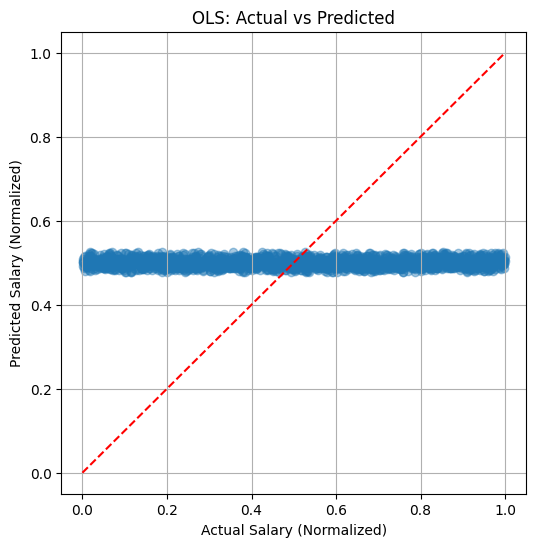

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, alpha=0.4)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("Actual Salary (Normalized)")
plt.ylabel("Predicted Salary (Normalized)")
plt.title("OLS: Actual vs Predicted")
plt.grid(True)
plt.show()

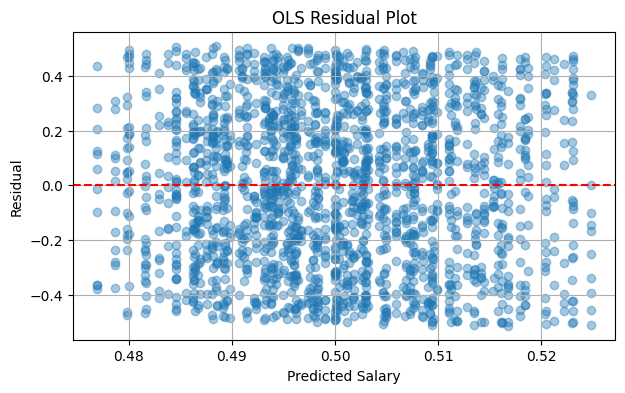

In [12]:
residuals = y_test - y_pred_ols

plt.figure(figsize=(7,4))
plt.scatter(y_pred_ols, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")
plt.title("OLS Residual Plot")
plt.grid(True)
plt.show()